# FEATURE SELECTION
Feature selection is a process where you automatically or manually select those features which have the maximum contribution to your model prediction output. Having irrelevant features can lead to a decrease in accuracy as your model learns from insignificant features.

This assignment will focus on manual selection of relevant features.
The dataset is of different camera models with different featues and their price. 

The assignment has both marked questions and unmarked ones. 
All questions written beside QUESTION # are evaluated for your final score and the ones that are not have been given only to improve your understanding.

## 1. Importing Important Packages

In [146]:
# ALL NECESSARY PACKAGES HAVE BEEN IMPORTED FOR YOU
# DO NOT MAKE ANY CHANGES IN THIS CODE CELL!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import json
ans = [None]*8

## 2. Importing the Dataset


In [147]:
# THE DATASET HAS BEEN IMPORTED AND STORED IN THE VARIABLE DATASET
# A SMALL SET OF THE DATA HAS BEEN SHOWN WHICH WILL GIVE A BRIEF UNDERSTANDING OF THE DATASET
# THE DESCRIPTION OF THE DATA HAS ALSO BEEN PRINTED
# DO NOT MAKE CHANGES IN THE CELL!

dataset = pd.read_csv("camera_dataset.csv")
dataset.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [148]:
# OBSERVE THE STATISTICS OF THE DIFFERENT FEATURES OF THE DATASET
# DO NOT CHANGE THIS CELL

print("Statistics of the Dataset: \n")
dataset.describe()

Statistics of the Dataset: 



,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [149]:
# Find the total number of NaN values present in the dataset.
# HINT: You can use "df.isna()" function (where df is your dataframe) from pandas to find NaN values.

# START YOUR CODE HERE:

dataset.isna().sum()


# END YOUR CODE HERE

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [150]:
# THE NaN VALUES HAVE BEEN CLEANED BY REMOVING THE CORRESPONDING DATA POINTS. 
# THE CLEANED DATASET IS STORED IN THE VARIABLE "data". USE IT FOR FURTHER USE

# DO NOT CHANGE THIS CELL!

def remove_nan(df):
  df_copy = df.copy()
  df_copy.dropna(inplace = True)
  return df_copy

data = remove_nan(dataset)

## 3. UNDERSTANDING THE DATA

In [151]:
# Find the number of data points i.e rows in the cleaned dataset i.e data variable. You can already see in an above cell how many features i.e columns there are.

# wRITE YOUR CODE HERE

data.shape[0]


# END YOUR CODE HERE

1036

In [152]:
# QUESTION 1: Find the datatype of the values stored in the "Model" column of the dataset and write them inside inverted commas. () (1 marks)
# QUESTION 2: Find the datatype of the values stored in the "Dimensions" column of the dataset and write them inside inverted commas. (1 marks)
#                Assign the answer of Question 1 to ans[0],
#                Assign the answer of Question 2 to ans[1]. 
#                eg:- ans[0] = "int64"/"float64" if the ans is int64/float64
# NOTE: Do not write "int". Write "int64".

In [153]:
# START YOUR CODE HERE:
print(data["Model"].dtypes)
print(data["Dimensions"].dtypes)



# END CODE HERE

object
float64


In [154]:
# WRITE YOUR ANSWERS HERE BY SUBSTITUTING None WITH YOUR ANSWER:
# DO NOT CHANGE THE INDEXES! OTHERWISE THE ANSWER MIGHT BE EVALUATED WRONG!

ans[0] = "object" 
ans[1] = "float64"

In [155]:
# QUESTION 3: Find out the number of unique release dates present in the dataset under the "Release date" column. (1 mark)
#             Assign the answer to ans[2].


In [156]:
# START YOUR CODE HERE

len(data["Release date"].unique())



# END YOUR CODE HERE

14

In [157]:
# WRITE YOUR ANSWER HERE BY SUBSTITUTING None WITH YOUR ANSWER

ans[2] = 14  

In [158]:
# If you run the same for the "Model" column you will observe that the 
# model column is unique and cannot be treated as a feature for predicting the price.
# Hence we will not bother about that column from now.

## 4. VISUALIZING THE DATA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faab53c4690>]],
      dtype=object)

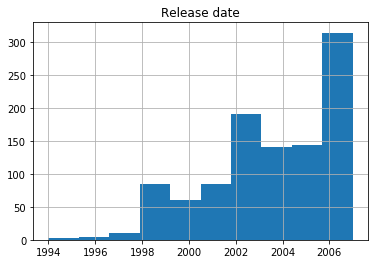

In [159]:
# RUN THE CELL BELOW TO OBSERVE THE HISTOGRAM OF THE "Release date" COLUMN
# DO NOT CHANGE THIS CELL!
data.hist(column = "Release date")

In [160]:
list(data.columns)

['Model',
 'Release date',
 'Max resolution',
 'Low resolution',
 'Effective pixels',
 'Zoom wide (W)',
 'Zoom tele (T)',
 'Normal focus range',
 'Macro focus range',
 'Storage included',
 'Weight (inc. batteries)',
 'Dimensions',
 'Price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faab5277050>,
      dtype=object)

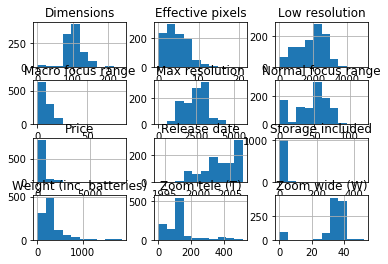

In [161]:
# TRY PLOTTING THE HISTOGRAM FOR THE OTHER COLUMNS

# HINT 1: You can use a for loop to plot the histogram for all the columns in one go.
# HINT 2: The code, "dataset.columns" gives a list of the columns of the dataset. 
# HINT 3: The "not in" phrase can be used to find if an element is not present in a particular list.

# START CODE HERE:
data.hist(column=list(data.columns))




# END CODE HERE

## 5. CORRELATION OF DATA

In [162]:
# QUESTION 4: Find the column which has the highest negative correlation with the "Price" column. Write the column name 
#             and the aboslute value of the correlation (1 + 1 = 2 marks)
#             eg: if correlation of A with B is -0.66 and correlation of A with C is -0.89 then the answer would be C and 0.89.
#             Assign the column name to ans[3] and remember to put your answer inside inverted commas.
#             Assign the correlation value to ans[4] and remember to write the absolute value i.e |x|.
#             eg: ans[3] = "Model" if the answer is the Model column
#             eg: ans[4] = 0.74 if the correlation value is -0.74. 

In [182]:
# START YOUR CODE HERE:
print(data.corr()["Price"])




# END CODE HERE

Release date              -0.022522
Max resolution             0.184201
Low resolution             0.154204
Effective pixels           0.190284
Zoom wide (W)             -0.459103
Zoom tele (T)             -0.189480
Normal focus range        -0.273854
Macro focus range         -0.127577
Storage included          -0.103046
Weight (inc. batteries)    0.464760
Dimensions                 0.264256
Price                      1.000000
Name: Price, dtype: float64


In [181]:
ans[3] = "Zoom wide (W)"  
ans[4] = abs(min(data.corr()["Price"]))

## 5. DISTINCTIVE FEATURES

In [165]:
# QUESTION 5: Find the number of data points whose (a) price > 50 percentile mark AND (b) Release date > 50 percentile mark. (2 mark)
#             NOTE: There are two conditions in the question above, both of which needs to be satisfied.
#             Assign the answer to ans[5].

In [166]:
# START YOUR CODE:



len(data[(data.Price > data.Price.quantile(.5)) & (data["Release date"] > data["Release date"].quantile(.5)) ])




# END YOUR CODE

220

In [167]:
ans[5] = 220  

In [168]:
# Also try finding the no data points whose (a) price > 50 percentile mark AND (b) Release Date < 59 percentile mark. 

# Can you justify why "Release date >/< 50 percentile mark" is not a good distinctive feature?

# Repeat the above steps with "Release data >/< (a) 25 percentile mark (b) 75 percentile mark (c)mean.
  
# Can you justify why "Release date" is not a good distinctive feature at all?

In [169]:
# QUESTION 6: Find the number of data points whose (a) price > 50 percentile mark AND (b) Weight (inc. batteries) > 75th percentile mark.(2 mark)
#             NOTE: BOTH the conditions stated above need to be satisfied.
#             Assign the answer to ans[6].

In [170]:
# START YOUR CODE HERE:

#len(data[(data.Price < data.Price.quantile(.5)) & (data["Weight (inc. batteries)"] < data["Weight (inc. batteries)"].quantile(.75)) ])
#data["Weight (inc. batteries)"].quantile(0.75)
len(data[(data.Price > data.Price.quantile(.5)) & (data["Weight (inc. batteries)"] > data["Weight (inc. batteries)"].quantile(.75)) ])


# END YOUR CODE HERE

165

In [171]:
# WRITE YOUR ANSWER HERE BY SUBSTITUTING None WITH YOUR ANSWER

ans[6] = 165     

In [172]:
# Try the same with (a) price > 50 percentile mark AND (b) Weight (inc. batteries) < 75 percentile mark.
# Can you justify whether Weight (inc. batteries) >/< 75 percentile mark is a good distinctive feature?
# HINT: Weight (inc. batteries) > 75 percentile mark implies that price will be ?

In [173]:
# TRY FITTING TWO LINEAR REGRESSION MODELS BY ONCE DROPPING THE FEATURE "Weight (inc. batteries)"
# AND ONCE BY KEEPING ALL FEATURES. THEN COMPARE THE TRAINING/VALIDATION ACCURACY OF THE TWO
# NOTE: A LINEAR REGRESSION MODEL HAS BEEN IMPLEMENTED FOR YOU IN THE CELL BELOW 

In [174]:
# PRE IMPLEMENTED LINEAR REGRESSOR
# CHANGE THIS CELL ONLY WHERE INDICATED!

def implement_linear_reg():
  # data_fs : Dataset from which you drop your most distinctive feature
  # data :  The original Dataset with all features intact (except "Model" which we dropped earlier)
  # X : the training features
  # Y : the training label (the "Price" column)
  # xtrain, xval : the training set and validation set respectively
  # linreg : The linear regression model
  
  linreg = LinearRegression(fit_intercept = True, normalize = False)

  data_fs = data.copy()              #Use data_fs as the dataset from where you drop the most distinctive feature. 

  # START YOUR CODE HERE:
  
  # You can write the column name enclosed within inverted commas inside the empty [] i.e eg: data_fs.drop(columns = ["Model"], inplace = True)
  data_fs.drop(columns = ["Weight (inc. batteries)"], inplace = True)

  # END YOUR CODE HERE
  
  Y = data["Price"]
  X = data.drop(columns = ["Price","Model"])
  xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size = 100, random_state = 40)
  
  linreg.fit(xtrain, ytrain)
  

  print("\n Train Accuracy of Linear Regression model with distinctive feature = ", linreg.score(xtrain, ytrain))
  print("\n Validation Accuracy of Linear Regression model with distinctive feature = ", linreg.score(xval, yval))
  
  Y = data_fs["Price"]
  X = data_fs.drop(columns = ["Price","Model"])
  xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size = 100, random_state = 40)

  linreg.fit(xtrain, ytrain)
  print("\n Train Accuracy of Linear Regression model without distinctive feature = ", linreg.score(xtrain, ytrain))
  print("\n Validation Accuracy of Linear Regression model without distinctive feature = ", linreg.score(xval, yval))


implement_linear_reg()

('\n Train Accuracy of Linear Regression model with distinctive feature = ', 0.30824841336860387)
('\n Validation Accuracy of Linear Regression model with distinctive feature = ', 0.17324036084798244)
('\n Train Accuracy of Linear Regression model without distinctive feature = ', 0.2601559853227291)
('\n Validation Accuracy of Linear Regression model without distinctive feature = ', 0.0880758827698781)


In [179]:
# RUN THE CODE BELOW TO GET YOUR ANSWERS EVALUATED.
# DO NOT CHANGE THIS CELL!

ans = [item for item in ans]
with open("ans.json", "w") as f:
  json.dump(ans, f)


In [180]:
! ../submit ans.json

{'accuracy': 90,
 'response': [{'obtained_marks': 1, 'question': 1, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 2, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 3, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 4, 'total_marks': 2},
              {'obtained_marks': 2, 'question': 5, 'total_marks': 2},
              {'obtained_marks': 3, 'question': 6, 'total_marks': 3}],
 'status': 'Success'}
